In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing


In [2]:
matrix_csv = pd.read_csv('Matrix_Factorization_Assignment.csv')

matrix_csv.shape

(45000, 5001)

In [3]:
matrix_csv.head()

,Index,0,1,2,3,4,5,6,7,8,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,11071,1.0,7.0,1.0,9.0,6.0,6.0,8.0,NaN,NaN,...,2.0,NaN,7.0,9.0,6.0,10.0,7.0,NaN,NaN,NaN
1,19900,NaN,3.0,3.0,6.0,NaN,3.0,5.0,7.0,9.0,...,NaN,NaN,NaN,5.0,9.0,3.0,0.0,NaN,9.0,2.0
2,25325,5.0,7.0,NaN,9.0,5.0,6.0,5.0,0.0,NaN,...,NaN,9.0,10.0,NaN,NaN,9.0,0.0,NaN,NaN,7.0
3,31006,3.0,4.0,1.0,NaN,5.0,NaN,10.0,NaN,8.0,...,3.0,2.0,1.0,3.0,NaN,NaN,2.0,NaN,4.0,2.0
4,37002,2.0,0.0,5.0,0.0,3.0,5.0,NaN,NaN,NaN,...,9.0,NaN,5.0,3.0,5.0,1.0,6.0,6.0,8.0,NaN


In [4]:
X = matrix_csv.copy()
for key,rows in X.iterrows():
    if(rows['Index'] % 296 ==0):
        X.drop(key, axis=0, inplace=True)
X.shape

(44854, 5001)

In [5]:
X= X.drop(['Index'],axis=1)

for key, cols in X.iteritems():
    if(int(key) !=0 and int(key) % 296 == 0):
        X.drop(key, axis=1, inplace=True)
X.shape

(44854, 4984)

In [6]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,1.0,7.0,1.0,9.0,6.0,6.0,8.0,NaN,NaN,10.0,...,2.0,NaN,7.0,9.0,6.0,10.0,7.0,NaN,NaN,NaN
1,NaN,3.0,3.0,6.0,NaN,3.0,5.0,7.0,9.0,NaN,...,NaN,NaN,NaN,5.0,9.0,3.0,0.0,NaN,9.0,2.0
2,5.0,7.0,NaN,9.0,5.0,6.0,5.0,0.0,NaN,10.0,...,NaN,9.0,10.0,NaN,NaN,9.0,0.0,NaN,NaN,7.0
3,3.0,4.0,1.0,NaN,5.0,NaN,10.0,NaN,8.0,0.0,...,3.0,2.0,1.0,3.0,NaN,NaN,2.0,NaN,4.0,2.0
4,2.0,0.0,5.0,0.0,3.0,5.0,NaN,NaN,NaN,0.0,...,9.0,NaN,5.0,3.0,5.0,1.0,6.0,6.0,8.0,NaN


In [7]:
def update_V(U,lambda_v,K,X1):
    A  = np.linalg.inv(np.dot(U.T,U)  +  lambda_v * np.eye(K))
    B = np.dot(X1, U)
    V = np.dot(B,A)
    return V

def update_U(V,lambda_u,K,X1):
    A  =  np.linalg.inv(np.dot(V.T , V)  + lambda_u *  np.eye(K))
    B = np.dot(X1, V)
    U = np.dot(B,A)
    return U


def compute_mse(y_true, y_pred):
    mask = np.nonzero(y_true)
    print(type(mask))
    print(len(mask[0]))
    print(len(mask[1]))
    
    meanserror = mean_squared_error(y_true[mask], y_pred[mask]) 
    return meanserror

def plot(loss, K):
    plt.plot(loss, label = 'K = ' + str(K))
    plt.legend()
    plt.xlabel('Number of iterations')
    plt.ylabel('MSE')
    plt.show()

In [8]:
X1 = X.replace(np.nan, 1)
X1=np.array(X1,dtype=np.float32)
print(X1.shape)

(44854, 4984)


In [9]:
def train(k, niteration):
    N,M = X1.shape
    lossvalue = []

    for K in k:
        
        np.random.seed(4)
        V = np.random.random((M,K))
        V = preprocessing.normalize(V)
        
        lambda_u = (0.00015 + 0.0001 * (296%8))
        lambda_v = (0.00025 - 0.0001 * (296%7))
        
        U = np.zeros((N,K))
        print('For k = ', K)
        
        for i in range(niteration):
            U = update_U(V,lambda_u,K,X1)
            V = update_V(U,lambda_v,K,X1.T)
            pred = U.dot(V.T)
            print(pred.shape)
            
            loss = compute_mse(X1,pred) 
            lossvalue.append(loss)
            
            print(i,loss)    
        
        plot(lossvalue, K)
        with open('Matrix_U.npy', 'wb') as f:
            np.save(f, U)
        with open('Matrix_V.npy', 'wb') as f:
            np.save(f, V)
        lossvalue.clear()

For k =  50
(44854, 4984)
<class 'tuple'>
211196991
211196991
0 9.649935279749204
(44854, 4984)
<class 'tuple'>
211196991
211196991
1 9.632609056513747
(44854, 4984)
<class 'tuple'>
211196991
211196991
2 9.621336343410485
(44854, 4984)
<class 'tuple'>
211196991
211196991
3 9.614253125742346
(44854, 4984)
<class 'tuple'>
211196991
211196991
4 9.609577978557006
(44854, 4984)
<class 'tuple'>
211196991
211196991
5 9.606305746241512
(44854, 4984)
<class 'tuple'>
211196991
211196991
6 9.603901050351793
(44854, 4984)
<class 'tuple'>
211196991
211196991
7 9.602065261870733
(44854, 4984)
<class 'tuple'>
211196991
211196991
8 9.60062126353558
(44854, 4984)
<class 'tuple'>
211196991
211196991
9 9.599457994761998
(44854, 4984)
<class 'tuple'>
211196991
211196991
10 9.598502462036649
(44854, 4984)
<class 'tuple'>
211196991
211196991
11 9.597704771312358
(44854, 4984)
<class 'tuple'>
211196991
211196991
12 9.597029682737384
(44854, 4984)
<class 'tuple'>
211196991
211196991
13 9.596451613428664
(4485

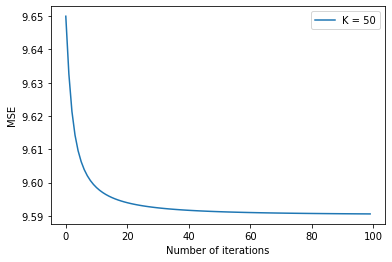

For k =  100
(44854, 4984)
<class 'tuple'>
211196991
211196991
0 9.542856290795356
(44854, 4984)
<class 'tuple'>
211196991
211196991
1 9.508356372227826
(44854, 4984)
<class 'tuple'>
211196991
211196991
2 9.485882430001597
(44854, 4984)
<class 'tuple'>
211196991
211196991
3 9.47174199189316
(44854, 4984)
<class 'tuple'>
211196991
211196991
4 9.462405556911706
(44854, 4984)
<class 'tuple'>
211196991
211196991
5 9.455876774469775
(44854, 4984)
<class 'tuple'>
211196991
211196991
6 9.451088929624024
(44854, 4984)
<class 'tuple'>
211196991
211196991
7 9.447445298800487
(44854, 4984)
<class 'tuple'>
211196991
211196991
8 9.444591021398457
(44854, 4984)
<class 'tuple'>
211196991
211196991
9 9.44230301342091
(44854, 4984)
<class 'tuple'>
211196991
211196991
10 9.440434302499506
(44854, 4984)
<class 'tuple'>
211196991
211196991
11 9.43888420585769
(44854, 4984)
<class 'tuple'>
211196991
211196991
12 9.437581469006233
(44854, 4984)
<class 'tuple'>
211196991
211196991
13 9.43647426948712
(44854,

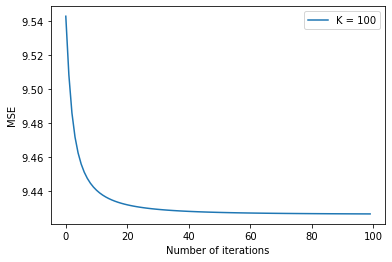

For k =  200
(44854, 4984)
<class 'tuple'>
211196991
211196991
0 9.32884106796304
(44854, 4984)
<class 'tuple'>
211196991
211196991
1 9.260885278750353
(44854, 4984)
<class 'tuple'>
211196991
211196991
2 9.216754462592895
(44854, 4984)
<class 'tuple'>
211196991
211196991
3 9.189181530135007
(44854, 4984)
<class 'tuple'>
211196991
211196991
4 9.171158251589558
(44854, 4984)
<class 'tuple'>
211196991
211196991
5 9.158698634525258
(44854, 4984)
<class 'tuple'>
211196991
211196991
6 9.14966844719355
(44854, 4984)
<class 'tuple'>
211196991
211196991
7 9.142875242896658
(44854, 4984)
<class 'tuple'>
211196991
211196991
8 9.137612517472297
(44854, 4984)
<class 'tuple'>
211196991
211196991
9 9.133438568204722
(44854, 4984)
<class 'tuple'>
211196991
211196991
10 9.130064330074022
(44854, 4984)
<class 'tuple'>
211196991
211196991
11 9.127293217992182
(44854, 4984)
<class 'tuple'>
211196991
211196991
12 9.124987138029013
(44854, 4984)
<class 'tuple'>
211196991
211196991
13 9.123046379748848
(4485

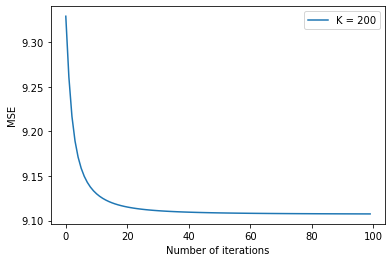

For k =  500
(44854, 4984)
<class 'tuple'>
211196991
211196991
0 8.691773511783632
(44854, 4984)
<class 'tuple'>
211196991
211196991
1 8.531926001054986
(44854, 4984)
<class 'tuple'>
211196991
211196991
2 8.429112056577068
(44854, 4984)
<class 'tuple'>
211196991
211196991
3 8.366016703007006
(44854, 4984)
<class 'tuple'>
211196991
211196991
4 8.325719214120944
(44854, 4984)
<class 'tuple'>
211196991
211196991
5 8.298579219915482
(44854, 4984)
<class 'tuple'>
211196991
211196991
6 8.27945074815931
(44854, 4984)
<class 'tuple'>
211196991
211196991
7 8.26547280999845
(44854, 4984)
<class 'tuple'>
211196991
211196991
8 8.254960258527033
(44854, 4984)
<class 'tuple'>
211196991
211196991
9 8.246866989642218
(44854, 4984)
<class 'tuple'>
211196991
211196991
10 8.240514406791371
(44854, 4984)
<class 'tuple'>
211196991
211196991
11 8.23544597049379
(44854, 4984)
<class 'tuple'>
211196991
211196991
12 8.231345023324547
(44854, 4984)
<class 'tuple'>
211196991
211196991
13 8.227986178308926
(44854

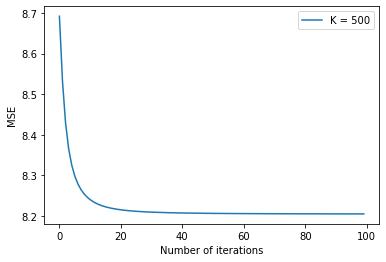

In [10]:
train([50,100,200,500], 100)

In [10]:
X1.shape

(44854, 4984)

For k =  1000
(44854, 4984)
<class 'tuple'>
211196991
211196991
0 7.6443799970707
(44854, 4984)
<class 'tuple'>
211196991
211196991
1 7.360423994250361
(44854, 4984)
<class 'tuple'>
211196991
211196991
2 7.18048952081779
(44854, 4984)
<class 'tuple'>
211196991
211196991
3 7.073098073764763
(44854, 4984)
<class 'tuple'>
211196991
211196991
4 7.006987044083616
(44854, 4984)
<class 'tuple'>
211196991
211196991
5 6.964259106204889
(44854, 4984)
<class 'tuple'>
211196991
211196991
6 6.935395115275794
(44854, 4984)
<class 'tuple'>
211196991
211196991
7 6.915166632722301
(44854, 4984)
<class 'tuple'>
211196991
211196991
8 6.900550604939487
(44854, 4984)
<class 'tuple'>
211196991
211196991
9 6.8897130705855565
(44854, 4984)
<class 'tuple'>
211196991
211196991
10 6.881495450741119
(44854, 4984)
<class 'tuple'>
211196991
211196991
11 6.8751407823543484
(44854, 4984)
<class 'tuple'>
211196991
211196991
12 6.870140285183806
(44854, 4984)
<class 'tuple'>
211196991
211196991
13 6.866143568020595
(44

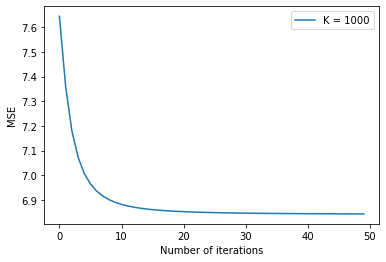

For k =  2000
(44854, 4984)
<class 'tuple'>
211196991
211196991
0 5.6076149313756325
(44854, 4984)
<class 'tuple'>
211196991
211196991
1 5.182312330087683
(44854, 4984)
<class 'tuple'>
211196991
211196991
2 4.920767300317618
(44854, 4984)
<class 'tuple'>
211196991
211196991
3 4.773120431324685
(44854, 4984)
<class 'tuple'>
211196991
211196991
4 4.688394475860094
(44854, 4984)
<class 'tuple'>
211196991
211196991
5 4.637429811089336
(44854, 4984)
<class 'tuple'>
211196991
211196991
6 4.605170773173119
(44854, 4984)
<class 'tuple'>
211196991
211196991
7 4.583769470082076
(44854, 4984)
<class 'tuple'>
211196991
211196991
8 4.568973316406484
(44854, 4984)
<class 'tuple'>
211196991
211196991
9 4.558373407756763
(44854, 4984)
<class 'tuple'>
211196991
211196991
10 4.550544947392746
(44854, 4984)
<class 'tuple'>
211196991
211196991
11 4.5446107337338475
(44854, 4984)
<class 'tuple'>
211196991
211196991
12 4.540010696139887
(44854, 4984)
<class 'tuple'>
211196991
211196991
13 4.536375399106435


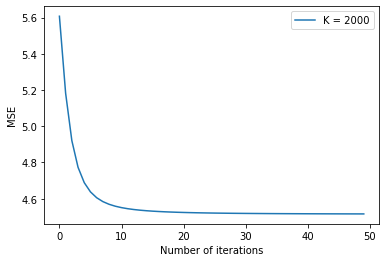

For k =  3000
(44854, 4984)
<class 'tuple'>
211196991
211196991
0 3.649862765440163
(44854, 4984)
<class 'tuple'>
211196991
211196991
1 3.2258264373920356
(44854, 4984)
<class 'tuple'>
211196991
211196991
2 2.9725632460467586
(44854, 4984)
<class 'tuple'>
211196991
211196991
3 2.836391695619534
(44854, 4984)
<class 'tuple'>
211196991
211196991
4 2.762261611400469
(44854, 4984)
<class 'tuple'>
211196991
211196991
5 2.7196403225095778
(44854, 4984)
<class 'tuple'>
211196991
211196991
6 2.69355289715278
(44854, 4984)
<class 'tuple'>
211196991
211196991
7 2.676636443789573
(44854, 4984)
<class 'tuple'>
211196991
211196991
8 2.6651123029603303
(44854, 4984)
<class 'tuple'>
211196991
211196991
9 2.6569331827945337
(44854, 4984)
<class 'tuple'>
211196991
211196991
10 2.650928172093179
(44854, 4984)
<class 'tuple'>
211196991
211196991
11 2.6463935577679916
(44854, 4984)
<class 'tuple'>
211196991
211196991
12 2.642887496981659
(44854, 4984)
<class 'tuple'>
211196991
211196991
13 2.6401218299605

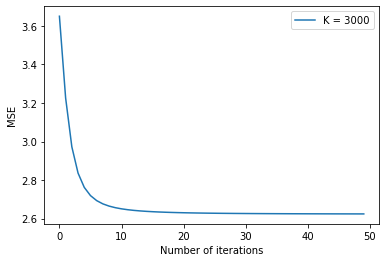

For k =  4000
(44854, 4984)
<class 'tuple'>
211196991
211196991
0 1.7710728396489313
(44854, 4984)
<class 'tuple'>
211196991
211196991
1 1.4913844145216997
(44854, 4984)
<class 'tuple'>
211196991
211196991
2 1.3288899820982392
(44854, 4984)
<class 'tuple'>
211196991
211196991
3 1.2444700387717051
(44854, 4984)
<class 'tuple'>
211196991
211196991
4 1.1994256749434475
(44854, 4984)
<class 'tuple'>
211196991
211196991
5 1.1736256058923202
(44854, 4984)
<class 'tuple'>
211196991
211196991
6 1.1577544615209683
(44854, 4984)
<class 'tuple'>
211196991
211196991
7 1.1473850442551456
(44854, 4984)
<class 'tuple'>
211196991
211196991
8 1.1402714181558544
(44854, 4984)
<class 'tuple'>
211196991
211196991
9 1.1351943986896376
(44854, 4984)
<class 'tuple'>
211196991
211196991
10 1.1314512973328426
(44854, 4984)
<class 'tuple'>
211196991
211196991
11 1.1286159957797124
(44854, 4984)
<class 'tuple'>
211196991
211196991
12 1.1264187648597694
(44854, 4984)
<class 'tuple'>
211196991
211196991
13 1.12468

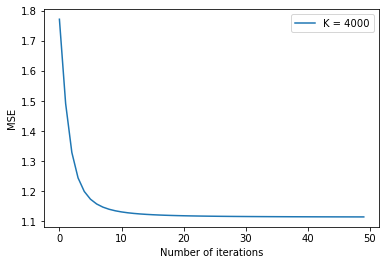

For k =  4500
(44854, 4984)
<class 'tuple'>
211196991
211196991
0 0.8610150303412162
(44854, 4984)
<class 'tuple'>
211196991
211196991
1 0.7066538793817682
(44854, 4984)
<class 'tuple'>
211196991
211196991
2 0.618191143377734
(44854, 4984)
<class 'tuple'>
211196991
211196991
3 0.5726958231740469
(44854, 4984)
<class 'tuple'>
211196991
211196991
4 0.5482515416736135
(44854, 4984)
<class 'tuple'>
211196991
211196991
5 0.533944739252078
(44854, 4984)
<class 'tuple'>
211196991
211196991
6 0.5248966225597262
(44854, 4984)
<class 'tuple'>
211196991
211196991
7 0.5188188326542509
(44854, 4984)
<class 'tuple'>
211196991
211196991
8 0.5145439965450593
(44854, 4984)
<class 'tuple'>
211196991
211196991
9 0.5114275403807873
(44854, 4984)
<class 'tuple'>
211196991
211196991
10 0.5090894331884782
(44854, 4984)
<class 'tuple'>
211196991
211196991
11 0.5072933999513252
(44854, 4984)
<class 'tuple'>
211196991
211196991
12 0.5058860723992634
(44854, 4984)
<class 'tuple'>
211196991
211196991
13 0.5047643

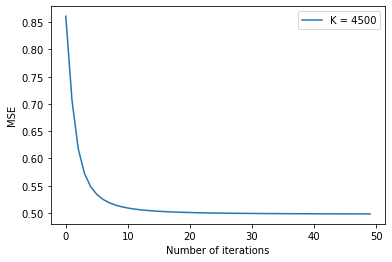

For k =  5000
(44854, 4984)
<class 'tuple'>
211196991
211196991
0 6.119884529692672e-08
(44854, 4984)
<class 'tuple'>
211196991
211196991
1 3.877664533038731e-08
(44854, 4984)
<class 'tuple'>
211196991
211196991
2 2.7648201980641593e-08
(44854, 4984)
<class 'tuple'>
211196991
211196991
3 2.1267034421647114e-08
(44854, 4984)
<class 'tuple'>
211196991
211196991
4 1.7494696931366533e-08
(44854, 4984)
<class 'tuple'>
211196991
211196991
5 1.5134557753579624e-08
(44854, 4984)
<class 'tuple'>
211196991
211196991
6 1.2777399779380282e-08
(44854, 4984)
<class 'tuple'>
211196991
211196991
7 1.124523509309699e-08
(44854, 4984)
<class 'tuple'>
211196991
211196991
8 1.0020563201635441e-08
(44854, 4984)
<class 'tuple'>
211196991
211196991
9 9.058760563556528e-09
(44854, 4984)
<class 'tuple'>
211196991
211196991
10 8.34913348052911e-09
(44854, 4984)
<class 'tuple'>
211196991
211196991
11 7.582025945225691e-09
(44854, 4984)
<class 'tuple'>
211196991
211196991
12 6.891328472289692e-09
(44854, 4984)
<c

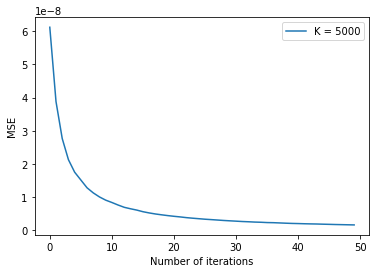

In [10]:
train([1000,2000,3000,4000,4500,5000],50)

In [11]:
with open('Matrix_U.npy', 'rb') as f:
    U = np.load(f)

with open('Matrix_V.npy', 'rb') as f:
    V = np.load(f)

In [12]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity_of_U = cosine_similarity(U)
cosine_similarity_of_V = cosine_similarity(V)

In [14]:
U.shape

(44854, 5000)

In [15]:
V.shape

(4984, 5000)

In [16]:
import seaborn as sns; sns.set_theme()
ax1 = sns.heatmap(cosine_similarity_of_U)

MemoryError: Unable to allocate 15.0 GiB for an array with shape (44854, 44854) and data type float64